In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use('seaborn')

In [97]:
from os import truncate
class Perceptron():
    def __init__(self, X, y, numWeights, threshold, modelName,weights=None, maxIters=50, loadModel=False):
        trainOnes = np.ones((X.shape[0], 1))
        self.X = np.hstack((X, trainOnes)).astype('float')
        self.y = np.array([1 if i == 1 else -1 for i in y]).astype('float')
        self.numWeights = numWeights
        self.threshold = threshold
        self.maxIters = maxIters
        self.modelName = modelName
        if loadModel:
            self.weights, self.iters = self.loadModel()
        else:
            if weights is not None:
                self.weights = np.array(weights).astype('float')
            else:
                self.weights = np.array(np.random.normal(0, 1, numWeights + 1)).astype('float')
            self.iters = 0
    
    def plotGraph(self):
        x1 = [i[0] for i in self.X]
        if self.X.shape[1] == 1:
            x2 = [0 for i in range(self.X[0])]
        else:
            x2 = [i[1] for i in self.X]
        plt.scatter(x1, x2, c=self.y, cmap='coolwarm')

        if self.X.shape[1] == 3:
            x_ = np.linspace(-1, 2, 100)
            y_ = -(self.weights[2] + self.weights[0]*x_)/(self.weights[1]+1e-9)
            plt.plot(x_, y_, 'green')
        else:
            x_ = -(self.weights[1]/(self.weights[0] + 1e-9))
            x_ = np.linspace(x_, x_, 100)
            y_ = np.linspace(0, 2, 100)
            plt.plot(x_, y_, 'green')
        plt.show()

    def updateWeights(self):
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights.T, self.X[i]) <= self.threshold:
                self.weights += (self.y[i] * self.X[i])
                return

    def checkConvergence(self):
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights.T, self.X[i]) <= self.threshold:
                return False
        return True

    def train(self):
        steps = 0
        while steps < self.maxIters:
            steps += 1
            print(f'\nIteration number: {self.iters}\nWeights: {self.weights}')
            self.plotGraph()
            if self.checkConvergence() == False:
                self.updateWeights()
            else:
                self.saveModel()
                return
            self.iters += 1
    
    def saveModel(self):
        model = {
            "name": self.modelName, 
            "iterations": self.iters,
            "weights": self.weights
        }
        with open(f'{self.modelName}.pickle', 'wb') as f:
            pickle.dump(model, f)

    def loadModel(self):
        with open(f'{self.modelName}.pickle', 'rb') as f:
            model = pickle.load(f)
            return model['weights'], model['iterations']


In [98]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [99]:
X = np.array([[0], [1]])
y = np.array([1, 0])

In [100]:
p = Perceptron(X, y, 1, 0, weights=[3,2], modelName='notGate', loadModel=True)
print(p.weights)
print(p.weights.shape)
print(p.X)
print(p.X[0].shape)
print(p.y)

[-2.  1.]
(2,)
[[0. 1.]
 [1. 1.]]
(2,)
[ 1. -1.]



Iteration number: 11
Weights: [-2.  1.]


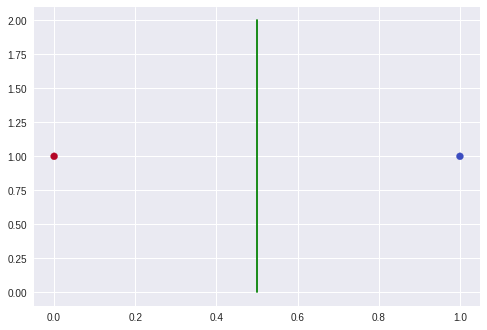

In [101]:
p.train()

In [26]:
print(p.weights)
print(p.X)
print(p.y)
print(p.threshold)

[-0.9  0.1]
[[0. 1.]
 [1. 1.]]
[ 1 -1]
0
